# SMI data analysis with Python
**Authors**:<br>Marlon Marzer, marlon.marzer@stud.hslu.ch<br>Dario Schürch, dario.schuerch@hslu.ch<br>
**Lecturer**:<br>Simon Broda, simon.broda@hslu.ch

## Goal, structure and  content of the following "Leistungsnachweis"

#### Basic idea: 
We are comparing and visualising with different python codes five different shares from the SMI Index during the financial crisis as also during the COVID-pandemic.

#### Structure
- installation of packages and import of the modules used for these codes
- visualisation of the moving averages (50-day & 200-day base from the year 2004-2022)
- visualisation of the moving averages (50-day & 100-day base from the year 2008-2010)
- visualisation of the moving averages (50-day & 100-day base from the year 2019-2021)
- volatility clusterting SMI 2004-2022 as a list and graphic in percentage
- comparison volatility SMI 2008-2010 and SMI 2019-2021 as a list and boxplot for both crises
- extract the data of the compared five shares of the sample portfolio
- visualisation adjusted closing prices sample portfolio
- max. portfolio loss sample portfolio 2008-2010 and 2019-2021
- VaR sample portfolio 2008-2010 and 2019-2021
- checking distributions of the returns against normal distribution
- Sharpe Ratio
- conclussion 


## Install the packages and import the modules

In [2]:
#!pip install yfinance
#!pip install datetime
#!pip install pandas_datareader
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
from datetime import datetime
from pandas_datareader import data as pdr
from scipy.stats import norm

# Calculate the moving average, 50-day moving average and a 200-day moving average for the SMI 2004-2022

## Download the SMI data 2004-2022 which is needed

We are aware that it is partly not necessary to convert the data into CSV files. But we will do this to show that we can also operate with pandas and data frames.

##### To get an overview let's have a look at the SMI from 2004 until today.

In [3]:
start = datetime(2004,1,1)
end = datetime.today()
SMI= yf.download("^SSMI", start, end)
SMI.to_csv("SMI_ALL.csv")

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving averages SMI 2004-2022')

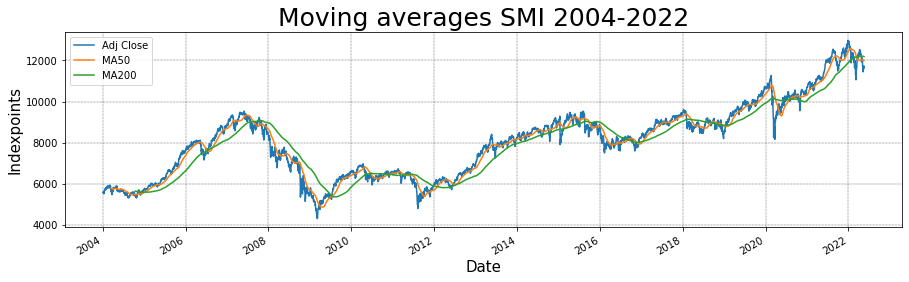

In [4]:
SMI["MA50"] = SMI["Adj Close"].rolling(50).mean()
SMI["MA200"] = SMI["Adj Close"].rolling(200).mean()
SMI["Adj Close"].plot(figsize = (15,4))
SMI["MA50"].plot()
SMI["MA200"].plot()
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()
plt.ylabel("Indexpoints", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving averages SMI 2004-2022", fontsize = 25)

## Findings
Both crises are clearly visible in the graph.The financial crisis was a long-lasting downward trend, whereas the Corona crisis was a short and intense shock. The recovery from the Corona crisis was also much faster than the one from the financial crisis.

# Calculate the moving average, 50-day moving average and a 100-day moving average for the SMI 2008-2010

##### Let us now take a closer look at the period 2008-2010.

## Download the SMI data 2008-2010 which is needed

In [5]:
start = datetime(2008,1,1)
end = datetime(2010,12,12)
SMI_08= yf.download("^SSMI", start, end)
SMI_08.to_csv("SMI_08.csv")


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving averages SMI 2008-2010')

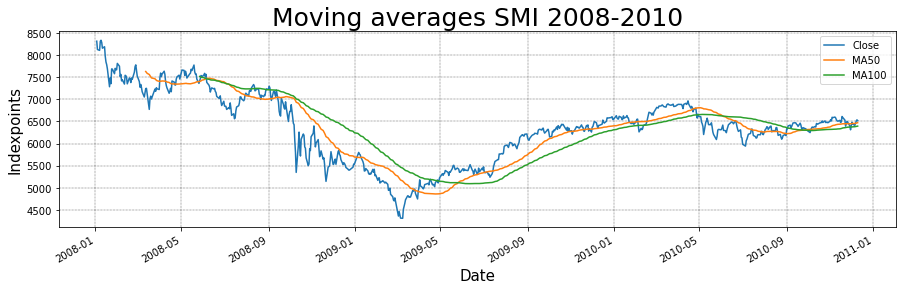

In [6]:
SMI_08 ["MA50"] = SMI_08["Close"].rolling(50).mean()
SMI_08 ["MA100"] = SMI_08["Close"].rolling(100).mean()
SMI_08["Close"].plot(figsize = (15,4))
SMI_08["MA50"].plot()
SMI_08["MA100"].plot()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.gcf().autofmt_xdate()
plt.legend()
plt.ylabel("Indexpoints", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving averages SMI 2008-2010", fontsize = 25)


# Findings 
The graph shows how long-lasting this crisis was. There was an almost one-year downward trend. The recovery was quite steady and lasted more or less as long as the downfall. Even after three years the SMI still had not reached the level he had before the crisis.

# Calculate the moving average, 50-day moving average and a 100-day moving average for the SMI 2019-2021

##### Let us now take a closer look at the period 2008-2010.

## Download the SMI data 2019-2021 which is needed

In [7]:
start = datetime(2019,1,1)
end = datetime(2021,12,31)
SMI_19 = yf.download("^SSMI", start, end)
SMI_19.to_csv("SMI_19.csv")

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Moving averages SMI 2019-2021')

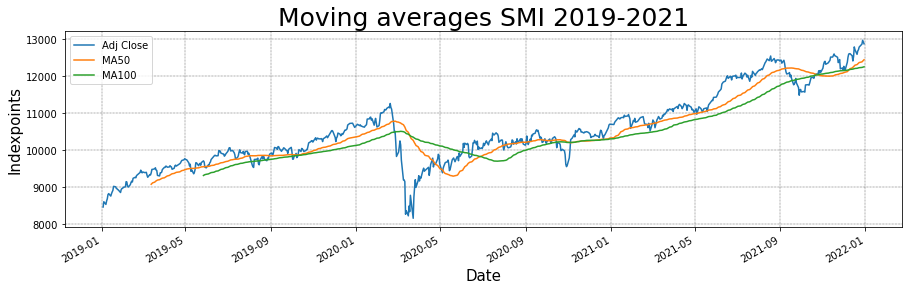

In [8]:
SMI_19["MA50"] = SMI_19["Adj Close"].rolling(50).mean()
SMI_19["MA100"] = SMI_19["Adj Close"].rolling(100).mean()
SMI_19["Adj Close"].plot(figsize = (15,4))
SMI_19["MA50"].plot()
SMI_19["MA100"].plot()
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.gcf().autofmt_xdate()
plt.legend()
plt.ylabel("Indexpoints", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.title("Moving averages SMI 2019-2021", fontsize = 25)

# Findings
The Corona crisis was an extremely short and intense price slump of the SMI. The SMI quickly began to recover but with every new variant of the virus there were new measures that slowed down the recovery or worse, the SMI began to sink again. In the middle of the year 2021 there was almost a boom, after people were able to consume again. The dip at the end of 2021 is the breakout of the Omicron variant. In the end, the SMI returned to his pre-crisis level after more or less one year. 

# Volatility clusterting SMI 2004-2022

In order to obtain an overview of volatility, we have created a volatility clustering. To calculate the volatility clustering , the first step is to calculate the log return. We have additionally calculated the percentage changes to show that the values are almost identical.

In [9]:
df_04 = pd.read_csv("SMI_ALL.csv",sep = ",", index_col=0)
df_04["Pct Change"]= df_04["Adj Close"].pct_change()
df_04["Log Return"]= np.log(df_04["Adj Close"]/df_04["Adj Close"].shift(1))
df_04 =df_04[1:] #Remove the first line (NaN)
df_04.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2004-01-06,5588.600098,5596.600098,5551.000000,5596.600098,5596.600098,43946200,0.002490,0.002487
2004-01-07,5602.899902,5620.899902,5562.600098,5583.399902,5583.399902,53545400,-0.002359,-0.002361
2004-01-08,5609.899902,5654.700195,5599.100098,5605.100098,5605.100098,97316800,0.003887,0.003879
2004-01-09,5620.700195,5630.000000,5542.299805,5574.700195,5574.700195,64582400,-0.005424,-0.005438
2004-01-12,5532.600098,5558.200195,5496.200195,5507.700195,5507.700195,73905600,-0.012019,-0.012091


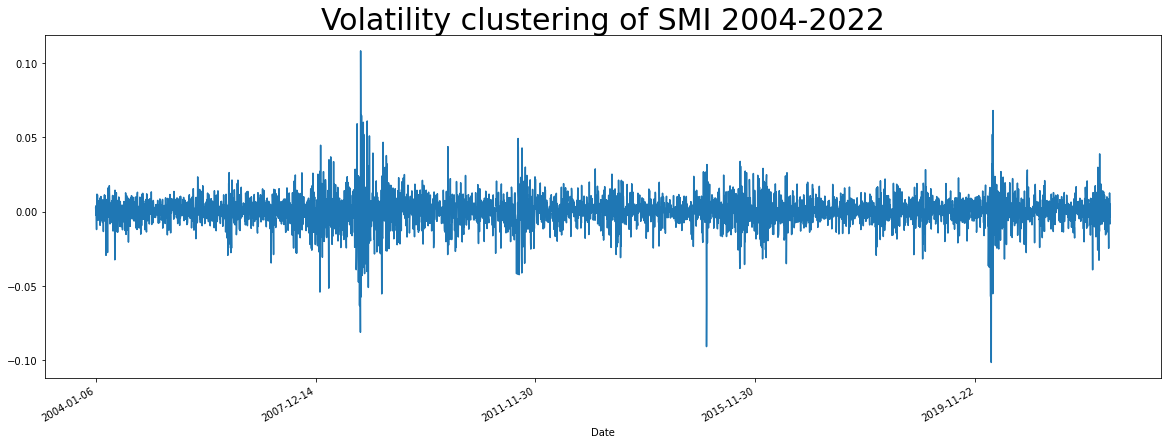

In [10]:
df_04["Log Return"].plot(figsize = (20,7))
plt.title("Volatility clustering of SMI 2004-2022",  fontsize = 30)
plt.gcf().autofmt_xdate()



# Findings
The volatility clustering shows in the year 2008 the big impact of the financial crisis. Aftwards there were some smaller impacts like the Eurocrisis or the abolition of the minimum Euro exchange rate. At the end of the graphic occurs the great but narrow impact of the Corona crisis. Also in this graph the finacial crisis is clearly wider than the Corona crisis.

# Comparison the volatility of the SMI 2008-2010 2019-2021 with various tools

## Calculate the Log Return and the percentage changes 

In [11]:
df_08 = pd.read_csv("SMI_08.csv",sep = ",", index_col=0)
df_08["Pct Change"]= df_08["Adj Close"].pct_change()
df_08["Log Return"]= np.log(df_08["Adj Close"]/df_08["Adj Close"].shift(1))
df_08 =df_08[1:] #Remove the first line (NaN)
df_08.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2008-01-04,8306.700195,8344.299805,8109.899902,8130.000000,8130.000000,82516600,-0.022696,-0.022957
2008-01-07,8090.500000,8213.099609,8070.299805,8110.600098,8110.600098,102996500,-0.002386,-0.002389
2008-01-08,8128.899902,8385.400391,8127.600098,8316.400391,8316.400391,132311200,0.025374,0.025058
2008-01-09,8263.500000,8345.500000,8216.299805,8339.799805,8339.799805,107972400,0.002814,0.002810
2008-01-10,8365.700195,8379.299805,8227.599609,8290.799805,8290.799805,94847600,-0.005875,-0.005893


In [12]:
df_19 = pd.read_csv("SMI_19.csv",sep = ",", index_col=0)
df_19["Pct Change"]= df_19["Adj Close"].pct_change()
df_19["Log Return"]= np.log(df_19["Adj Close"]/df_19["Adj Close"].shift(1))
df_19 =df_19[1:] #Remove the first line (NaN)
df_19.head()

,Open,High,Low,Close,Adj Close,Volume,Pct Change,Log Return
Date,,,,,,,,
2019-01-04,8493.839844,8627.360352,8441.339844,8608.559570,8608.559570,58578200,0.016838,0.016698
2019-01-07,8616.179688,8617.009766,8491.500000,8535.950195,8535.950195,46142100,-0.008435,-0.008470
2019-01-08,8560.330078,8670.669922,8560.160156,8629.480469,8629.480469,53742100,0.010957,0.010898
2019-01-09,8661.429688,8700.179688,8625.400391,8687.709961,8687.709961,52999900,0.006748,0.006725
2019-01-10,8640.240234,8812.889648,8617.929688,8801.480469,8801.480469,52626400,0.013096,0.013011


## Calculate the volatility as a ratio of over 3 years


##### We assume that a stock exchange year contains 252 days.

In [13]:
std_SMI_08= df_08["Log Return"].std()
std_SMI_19= df_19["Log Return"].std()
std_SMI_08_3Y = std_SMI_08 * np.sqrt(756) * 100
std_SMI_19_3Y = std_SMI_19 * np.sqrt(756) * 100
print(std_SMI_08_3Y)
print(std_SMI_19_3Y)

43.26581473111181
28.65452644105569


## Plotting a histogram of the volatility of Log Returns SMI 2008-2010 and 2019-2021

Text(0.5, 1.0, 'Volatility SMI 2008-2010 and SMI 2019-2021')

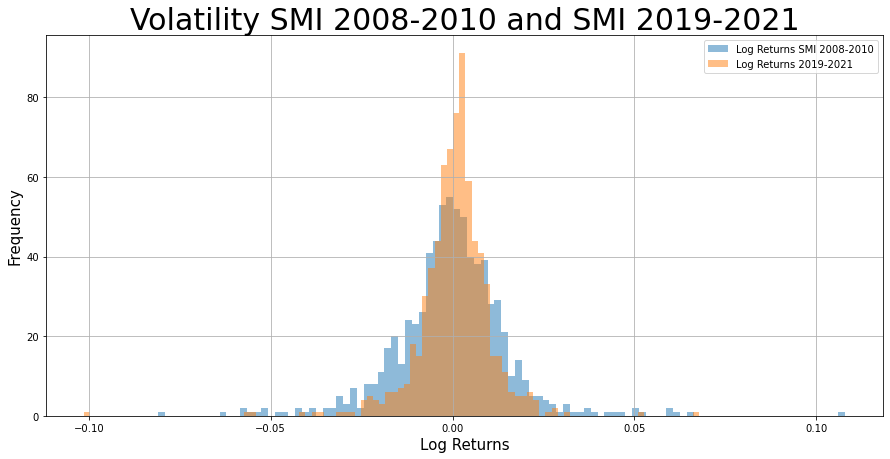

In [14]:
df_08["Log Return"].hist(bins = 100, label = "Log Returns SMI 2008-2010", alpha = 0.5, figsize = (15,7))
df_19["Log Return"].hist(bins = 100, label = "Log Returns 2019-2021", alpha = 0.5)
plt.legend()
plt.ylabel("Frequency", fontsize =15)
plt.xlabel("Log Returns", fontsize =15)
plt.title("Volatility SMI 2008-2010 and SMI 2019-2021", fontsize = 30)

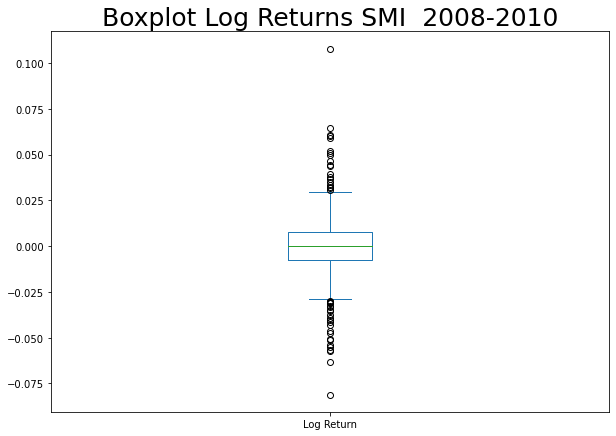

In [15]:
box_08 = df_08["Log Return"]
plt.figure(figsize = (10,7))
plt.title("Boxplot Log Returns SMI  2008-2010", fontsize = (25))
ax = box_08.plot.box()


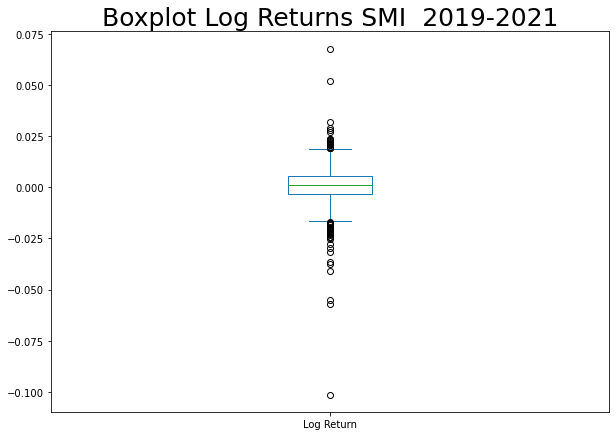

In [16]:
box_19 = df_19["Log Return"]
plt.figure(figsize = (10,7))
plt.title("Boxplot Log Returns SMI  2019-2021", fontsize = (25))
ax = box_19.plot.box()

# Findings
The key numbers already clearly show, that the SMI from 2008-2010 was much more volatile. This finding is also recognisable in the histogram and the boxplot. 

# Comparison of the periods 2008-2010 and 2019-2021 using a portfolio of five selected shares from the SMI

The sample portfolio contains the following stocks, each with a weighting of 20%:

- Novartis
- UBS
- Nestlé
- Credit Suisse
- ABB



# Comparison adjusted closing prices of the SMI sample portfolio 2004-2021
##### To get an overview let's have a look at the adjusted closing prices in our sample portfolio.
##### First we calculate the "Base 100" for each share in the portfolio.


In [17]:
start = datetime(2004,1,1)
end = datetime(2021,12,31)

df_ABBN= yf.download("ABBN.SW", start, end)
Base_100 = df_ABBN.iat[0,4]
df_ABBN["Base 100"] = (df_ABBN["Adj Close"]/Base_100 *100)
df_ABBN = df_ABBN[1:]

df_UBSG= yf.download("UBSG.SW", start, end)
Base_100 = df_UBSG.iat[0,4]
df_UBSG["Base 100"] = (df_UBSG["Adj Close"]/Base_100 *100)
df_UBSG = df_UBSG[1:] 

df_NESN= yf.download("NESN.SW", start, end)
Base_100 = df_NESN.iat[0,4]
df_NESN["Base 100"] = (df_NESN["Adj Close"]/Base_100 *100)
df_NESN = df_NESN[1:] 

df_CSGN= yf.download("CSGN.SW", start, end)
Base_100 = df_CSGN.iat[0,4]
df_CSGN["Base 100"] = (df_CSGN["Adj Close"]/Base_100 *100)
df_CSGN = df_CSGN[1:] 

df_NOVN= yf.download("NOVN.SW", start, end)
Base_100 = df_NOVN.iat[0,4]
df_NOVN["Base 100"] = (df_NOVN["Adj Close"]/Base_100 *100)
df_NOVN = df_NOVN[1:] 
df_NOVN.head() #Overview Novartis


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Base 100
Date,,,,,,,
2004-01-02,49.636063,49.636063,49.636063,49.636063,24.942989,0,100.000000
2004-01-05,50.078056,50.872765,49.988773,50.872765,25.564453,13449933,102.491537
2004-01-06,50.829449,51.093761,50.474968,51.050446,25.653744,7988396,102.849516
2004-01-07,51.183044,51.756756,50.872765,51.050446,25.653744,12705332,102.849516
2004-01-08,51.358959,51.448242,50.430767,50.651768,25.453403,10347106,102.046323


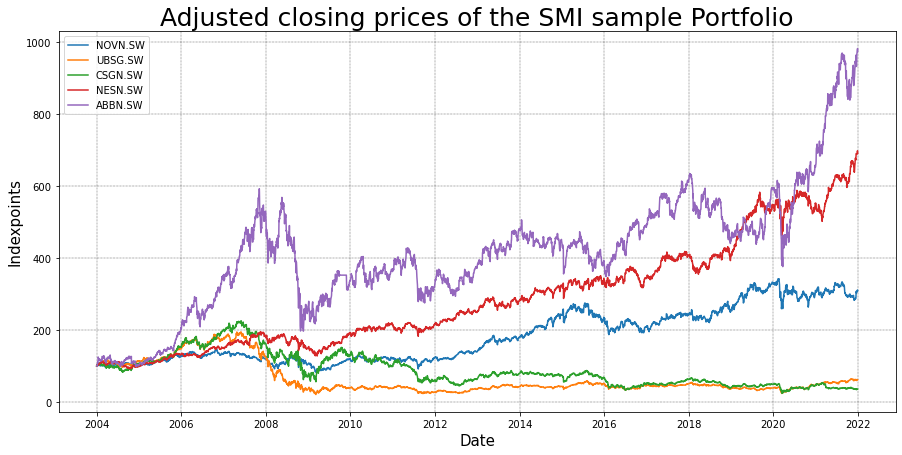

In [18]:
start = datetime(2004,1,1)
end = datetime.today()
plt.figure(figsize = (15,7))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)
plt.ylabel("Indexpoints", fontsize =15)
plt.xlabel("Date", fontsize =15)
plt.plot(df_NOVN["Base 100"], label ="NOVN.SW")
plt.plot(df_UBSG["Base 100"], label ="UBSG.SW")
plt.plot(df_CSGN["Base 100"], label ="CSGN.SW")
plt.plot(df_NESN["Base 100"], label ="NESN.SW")
plt.plot(df_ABBN["Base 100"], label ="ABBN.SW")
plt.title("Adjusted closing prices of the SMI sample Portfolio", fontsize = 25)
plt.legend()

# Calculate the maximum portfolio loss of the sample portfolio from 2008-2010

From an economical perspective the following duration is actually not useful. Nevertheless it shows the different extends of the two crises and how the maximum portfolio losses during the crises differ. 

- We assume that the returns of the stocks in our portfolio are normally distributed when calculating Value at Risk (VaR).
- We use pct change to calculate VaR because they are quite similar to log return as you have seen in the table above.



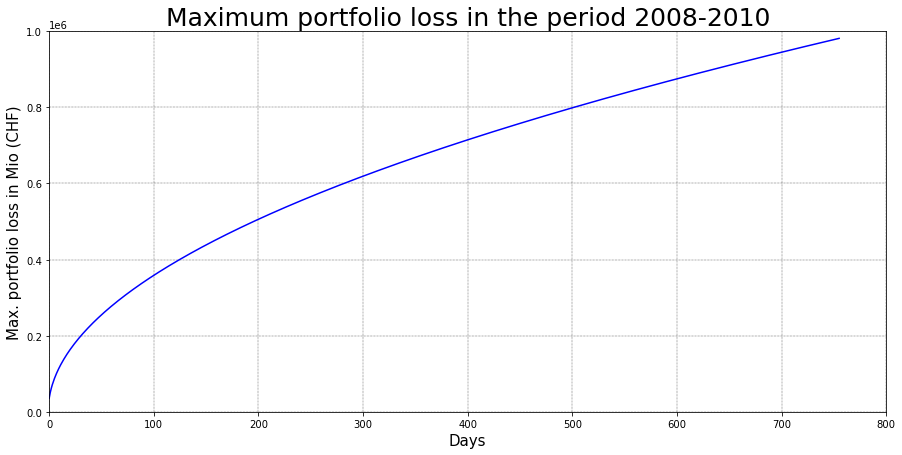

In [19]:
portfolio_08 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_08 = np.array([.2, .2, .2, .2, .2])
investment_08 = 1000000
start_08 = datetime(2008,1,1)
end_08 = datetime(2010,12,31)
df_08 = pdr.get_data_yahoo(portfolio_08, start_08, end_08) ["Adj Close"]
returns_08 = df_08.pct_change()

# Generate Var-Cov matrix
cov_matrix_08 = returns_08.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_08 = returns_08.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_08 = mean_returns_08.dot(weights_08)

#Standard deviation of the portfolio
std_portfolio_08 = np.sqrt(weights_08.T.dot(cov_matrix_08).dot(weights_08))

#Mean of investment
mean_investment_08 = (1+mean_portfolio_08) * investment_08

#Standard deviation of investment
std_investment_08 = investment_08 * std_portfolio_08

#confidence interval (95%)
alpha_08 = 0.05
var_cutoff_08 = norm.ppf(alpha_08, mean_investment_08, std_investment_08) #normal cumulative distribution
Var_08 = investment_08 - var_cutoff_08
#print(Var_08)


#Calculate VaR over 3 Years
import matplotlib.pyplot as plt
Var_array_08= []
days_08 = int(756)
for x in range(1, days_08+1):
    Var_array_08.append(np.round(Var_08 * np.sqrt(x), 2))
    # acitvate the following code to see VaR over two months
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_08 * np.sqrt(x), 2)))


plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss in Mio (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,1_000_000)
plt.title("Maximum portfolio loss in the period 2008-2010", fontsize = 25)
plt.plot(Var_array_08, "b")
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)


# Findings
The risk increases with increasing investment duration.

## Calculating the Value at Risk (VaR)

In [20]:
returns_08 = returns_08.fillna(0.0)
portfolio_returns_08 = returns_08.iloc[-days_08:].dot(weights_08)
VaR_08 = np.percentile(portfolio_returns_08, 100 * (alpha_08)) * investment_08
print(VaR_08)


-32374.369194106348


## Plotting the Value at Risk (VaR)

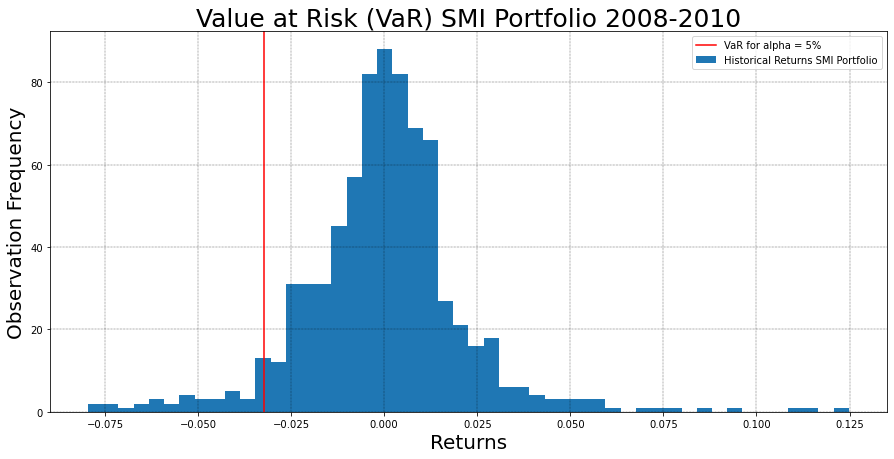

In [21]:
portfolio_returns_08 = returns_08.fillna(0.0).iloc[-days_08:].dot(weights_08)
portfolio_VaR_08 = VaR_08
portfolio_VaR_return_08 = portfolio_VaR_08 / investment_08
plt.figure(figsize=(15,7))
plt.hist(portfolio_returns_08, bins= 50)
plt.axvline(portfolio_VaR_return_08, color="r", linestyle="solid")
plt.legend(["VaR for alpha = 5%", "Historical Returns SMI Portfolio" ])
plt.title("Value at Risk (VaR) SMI Portfolio 2008-2010", fontsize = 25)
plt.xlabel("Returns", fontsize = 20)
plt.ylabel("Observation Frequency", fontsize = 20)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.3)

## Findings
Max. loss during the financial crisis from 2008-2010 with a confidental level of 95% is CHF 32 374.

#  Checking distributions of the returns against normal distribution

As mentioned in the calculation section, when calculating VaR we assume that the returns of the stocks in our portfolio are normally distributed. Of course, we cannot predict this for the future, but we can at least check how the historical returns were distributed to assess whether the VaR is appropriate for our sample portfolio.

##  5 shares of the sample portfolio vs. normal distribution during the period 2008-2010


In [ ]:
returns_08["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Novartis returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()



In [ ]:
returns_08["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("UBS returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()


In [ ]:
returns_08["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Nestle returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

In [ ]:
returns_08["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("Credit Suisse returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

In [ ]:
returns_08["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_08 - 3* std_portfolio_08, mean_portfolio_08 +3 *std_portfolio_08,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_08, std_portfolio_08), "r")
plt.title("ABB returns 2008-2010 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

## Findings<br>
The plots show that the retruns are approximately normally distributed thus we may operate with the VaR.

# Calculate the maximum portfolio loss of the SMI sample portfolio 2019-2021


- We assume that the returns of the stocks in our portfolio are normally distributed when calculating Value at Risk (VaR).
- We use pct change to calculate VaR because they are quite similar to log return as you have seen in the table above.

In [ ]:
portfolio_19 = ["NOVN.SW", "UBSG.SW", "NESN.SW", "CSGN.SW", "ABBN.SW"]
weights_19 = np.array([.2, .2, .2, .2, .2])
investment_19 = 1000000
start_19 = datetime(2019,1,1)
end_19 = datetime(2021,12,31)
df_19 = pdr.get_data_yahoo(portfolio_19, start_19, end_19) ["Adj Close"]
returns_19 = df_19.pct_change()
#print(returns)

# Generate Var-Cov matrix 
cov_matrix_19 = returns_19.cov()
#print(cov_matrix)

#calculate mean returns of the stocks
mean_returns_19 = returns_19.mean()

#calculate mean returns for the portfolio and normalize against investments weights
mean_portfolio_19 = mean_returns_19.dot(weights_19)

#Standard deviation of the portfolio
std_portfolio_19 = np.sqrt(weights_19.T.dot(cov_matrix_19).dot(weights_19))

#Mean of investment
mean_investment_19 = (1+mean_portfolio_19) * investment_19

#Standard deviation of investment
std_investment_19 = investment_19 * std_portfolio_19

#Confidenceinterval (95%)
alpha_19 = 0.05
var_cutoff_19 = norm.ppf(alpha_19, mean_investment_19, std_investment_19) #normal cumulatice distribution
Var_19 = investment_19 - var_cutoff_19
#print(Var_19)

#Calculate VaR over 3 Years
Var_array_19= []
days_19 = int(752)
for x in range(1, days_19+1):
    Var_array_19.append(np.round(Var_19 * np.sqrt(x), 2))
    # acitvate code to see VaR over 2 months
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(Var_19 * np.sqrt(x), 


plt.figure(figsize=(15,7))
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Max. portfolio loss (CHF)", fontsize = 15)
plt.xlim(0,800)
plt.ylim(0,700_000)
plt.title("Maximum portfolio loss in the period 2019-2021", fontsize = 25)
plt.plot(Var_array_19, "b")
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)


## Calculating the Value at Risk (VaR)

In [ ]:
returns_19 = returns_19.fillna(0.0)
portfolio_returns_19 = returns_19.iloc[-days_19:].dot(weights_19)
VaR_19 = np.percentile(portfolio_returns_19, 100 * (alpha_19)) * investment_19
print(VaR_19)  


## Plotting the Value at Risk (VaR)

In [ ]:
portfolio_returns_19_ = returns_19.fillna(0.0).iloc[-days_19:].dot(weights_19)

portfolio_VaR_19 = VaR_19
portfolio_VaR_return_19 = portfolio_VaR_19 / investment_19

plt.figure(figsize=(15,7))
plt.hist(portfolio_returns_19, bins= 50)
plt.axvline(portfolio_VaR_return_19, color="r", linestyle="solid")
plt.legend(["VaR for alpha = 5%", "Historical Returns SMI Portfolio" ])
plt.title("Maximum portfolio loss in the period 2019-2021", fontsize = 25)
plt.xlabel("Returns", fontsize = 20)
plt.ylabel("Observation Frequency", fontsize = 20)
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)

## Findings
Max. loss during the Corona crisis from 2019-2021 with a confidental level of 95% is CHF 18 467.

#  Checking distributions of the returns against normal distribution

As mentioned in the calculation section, when calculating the VaR we assume that the returns of the stocks in our portfolio are normally distributed. Of course, we cannot predict this for the future, but we can at least check how the historical returns were distributed to assess whether the VaR is appropriate for our sample portfolio.

##  5 shares of the sample portfolio vs. normal distribution during the period from 2019-2021

In [ ]:
returns_19["NOVN.SW"].hist(bins = 100, label = "NOVN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Novartis returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

In [ ]:
returns_19["UBSG.SW"].hist(bins = 100, label = "UBSG.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("UBS returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

In [ ]:
returns_19["NESN.SW"].hist(bins = 100, label = "NESN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Nestle returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()


In [ ]:
returns_19["CSGN.SW"].hist(bins = 100, label = "CSGN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("Credit Suisse returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()

In [ ]:
returns_19["ABBN.SW"].hist(bins = 100, label = "ABBN.SW", alpha = 0.5, figsize = (10,4))
x = np.linspace(mean_portfolio_19 - 3* std_portfolio_19, mean_portfolio_19 +3 *std_portfolio_19,100)
plt.plot(x, scipy.stats.norm.pdf(x, mean_portfolio_19, std_portfolio_19), "r")
plt.title("ABB returns 2019-2021 vs. normal distribution", fontsize = (20))
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.3)
plt.legend()


# Findings
The plots show that the retruns are approximately normally distributed thus we may operate with the VaR.


# Sharpe Ratio of the sample portfolio from 2008-2010 and from 2019-2021

In [ ]:
returns_08 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_08 = std_portfolio_08
risk_free_return_08 = int(0) # assumption
sharpe_ratio_08= (mean_portfolio_08 - risk_free_return_08) / std_08
print(sharpe_ratio_08)

In [ ]:
returns_19 = np.sum(np.multiply(mean_returns_08, weights_08)) * 504
std_19 = std_portfolio_19
risk_free_return_19 = int (0) # assumption
sharpe_ratio_19= (mean_portfolio_19 - risk_free_return_19) / std_19
print(sharpe_ratio_19)

In [ ]:
y = [sharpe_ratio_08, sharpe_ratio_19]
x =[0.5, 1.5]
plt.figure(figsize=(10,7))
labels = "Portfolio 2008-2010", "Portfolio 2019-2021"
plt.ylim(-0.01,0.06)
plt.ylabel("Sharpe Ratio", fontsize = (15))
plt.title("Sharpe Ratio sample portfolio 2008-2010 vs. 2019-2021", fontsize = (20))
plt.bar(x, y, tick_label=labels, color=["darkgreen", "darkblue"])
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.2)
plt.xticks(x, fontsize = (15))
plt.show()


# Findings
The Sharpe Ratio of the portfolio 2019-2021 is much higher than the otherone. In other words, the return of the portfolio during the financial crisis was remarkably better.

# Conclussion
To sum it up, the financial crisis from 2008-2010 was a long-lasting downward trend for the SMI and the recovery took multiple years. Whereas the Corona crisis was more of a quick and heavy price slump. Compared to the financial crisis the risk of a great financial loss was a lot bigger than during the crisis occuring from 2019-2021.

# Reflection

#The last section of the report should be a reflection on your work. 
#Which problems did you encounter and how did you solve them? What was easy, what was hard? 
How would you rate the end result?


# Refernces
All data used was downloaded from Yahoo Finance.